# Data science salaries 2023

This dataset is useful for understanding the distribution of salaries in the data science field and how these can vary based on factors such as employee and employer location, level of experience, type of employment, among others. It allows us to explore the impact of remote work on data science salaries and begin to draw our own conclusions.

## Variables    


<table>
  <tr>
    <th>Column name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>work_year</td>.
    <td>The year in which the salary was paid</td>.
  </tr>
  <tr>
    <td>experience_level</td>
    <td>The level of experience on the job during the year.</td> </td>
  </tr>
  <tr>
    <td>employment_type</td>.
    <td>The type of employment for the role.
  </tr>
  <tr>
    <td>job_title</td>
    <td>The role performed during the year.
  </tr>
  <tr>
    <td>salary</td>
    <td>The total gross salary paid.</td> 
  </tr>
  <tr>
    <td>salary_currency</td>.
    <td>The currency of the salary paid as currency code ISO 4217.</td>
  </tr>
  <tr>
    <td>salaryinusd</td>
    <td>The salary in U.S. dollars (USD).</td>
  </tr>
  <tr>
    <td>employee_residence</td>.
    <td>The employee's primary country of residence during the work year as ISO country code 3166.</td>
  </tr>
  <tr>
    <td>remote_ratio</td>.
    <td>The total amount of work performed remotely.</td>
  </tr>
  <tr>
    <td>company_location</td>.
    <td>The country of the employer's head office or contracting branch office.</td>
  </tr>
  <tr>
    <td>company_size</td>
    <td>The median number of people that worked for the company during the year.</td>
  </tr>
</table>



The main objetive of this exercise is to learn and apply data analysis and visualization techniques using Python libraries such as Matplotlib, Seaborn, and Plotly.

The appropriate steps to complete it are:

1. **Explore the dataset**: Understand the structure of the dataset, the types of variables present, and how they are distributed. Clean and prepare the dataset: Manipulate the data to make it more accessible and useful for analysis. This may include handling missing values, converting data types, and generating new variables from existing ones.
    **Analyze the dataset:** Extract useful and meaningful information from the dataset using various data analysis techniques. </br> Visualize the data: Create charts and diagrams that help understand and communicate patterns and relationships present in the data.

To response the questions posed, the following libraries should be used:

- Use Matplotlib to create basic charts such as bar charts, line charts, and scatter plots.
- Use Seaborn to create more complex and visually appealing charts, leveraging its integration capabilities with pandas.
- Use Plotly to create interactive charts that allow for deeper data exploration.

### First step, data loading, cleaning, exploration and first understanding of our dataset

Import the necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px

Load the dataset:

In [3]:
df = pd.read_csv(r'C:\INSTALADORES\Documents\GitHub\Creacion-de-gr-ficos-con-librerias\ds_salaries.csv')

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


How many row and columns have the dataset?  

In [5]:
df.shape

(3755, 11)

What kind of data do we have?

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Are there missing values in the data set? 

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

What is the distribution of the variables in our dataset?

In [8]:
# We take out the names of the numerical and categorical columns
def kind_of_column (df):
    cat = []
    num = []
        
    for col in df.columns:
        if(df[col].dtype == "object"):
            cat.append(col)
        else:
            num.append(col)

    return cat , num

cat , num = kind_of_column(df)
print("Categorical columns: ", cat)
print("Numeric columns: ", num)

Categorical columns:  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Numeric columns:  ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [9]:
df.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


Creates a graph to visualize our numerical variables:

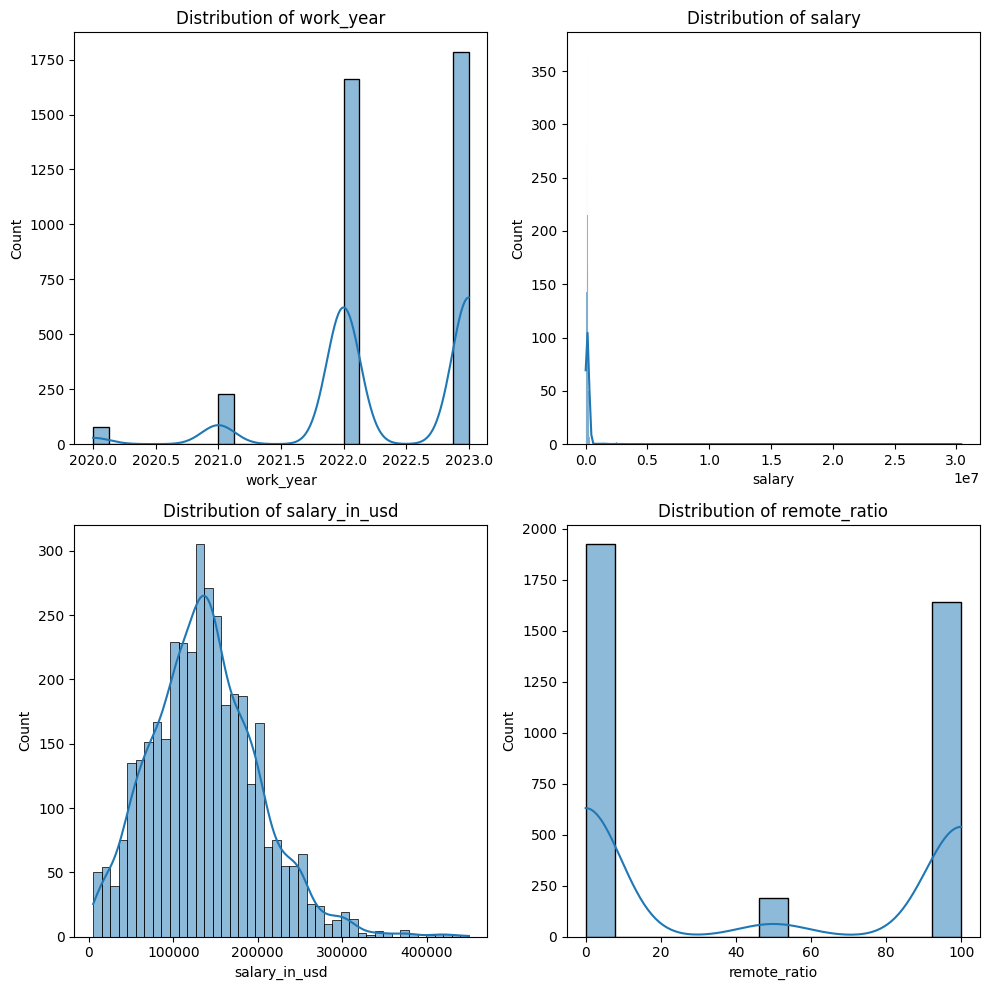

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
cols = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

for i, col in enumerate(cols):
    ax = axes[i // 2, i % 2]  # Access the individual axes using indexing
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Creates a graph to visualize our categorical variables:

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_size', "company_location"]
fig = make_subplots(rows=3, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(go.Histogram(x=df[cols[i]], nbinsx=20, name=f'Distribución de {cols[i]}'), row=row, col=col)

fig.update_yaxes(showticklabels=False, row=3, col=3)

fig.update_layout(height=400, width=700, title_text="Distribución de Variables", showlegend=False)
fig.update_xaxes(tickangle=60)
plt.tight_layout()
fig.show()

<Figure size 640x480 with 0 Axes>

Identifies the outliers of our dataset graphically: 

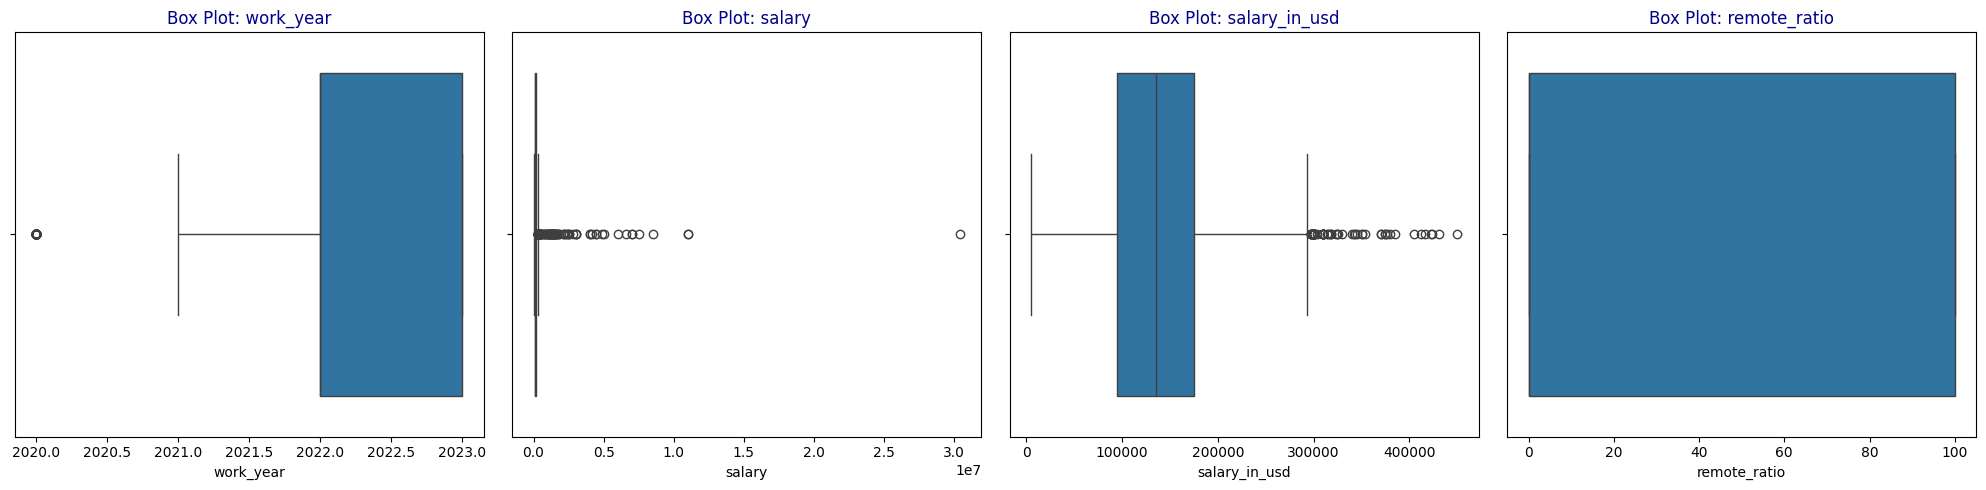

In [70]:
import math
def identify_outliers(dataframe):
    """
    This function creates a box plot for each numeric column in a DataFrame
    to help identify outliers.
    """
    # Select only numeric columns
    numeric_cols = dataframe.select_dtypes(include=np.number).columns

    # Create subplots
    ncols = 4
    nrows = math.ceil(len(numeric_cols) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

    # If the dataframe has fewer than 4 numeric columns, axes won't be a list of lists, so convert it to one for iteration
    if nrows == 1 or ncols == 1:
        axes = [axes]

    for i, col in enumerate(numeric_cols):
        row = i // ncols
        col_idx = i % ncols
        # Check if the column has more than one unique value to avoid errors
        if len(dataframe[col].unique()) > 1:
            sns.boxplot(x=dataframe[col], data=dataframe, ax=axes[row][col_idx])
            axes[row][col_idx].set_title(f"Box Plot: {col}", color="DarkBlue")
        else:
            print(f"Column {col} has only one unique value and cannot be plotted")

    plt.tight_layout()
    plt.show()

identify_outliers(df)

In [12]:
#now we use plotly to create a boxplot
for col in num:
    fig = px.box(df, y=col, title=f'Boxplot of {col}',template="plotly_dark")
    fig.show()


### Questions to answer:    

What is the average salary by experience level?

In [13]:
average_salary_per_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
fig=px.bar(average_salary_per_experience,x="experience_level", y="salary_in_usd",title="Average Salary per Experience Level",template="plotly_dark")
fig.update_xaxes(title_text="Experience Level")
fig.update_yaxes(title_text="Salary in US$")
fig


In [14]:
average_salary_per_experience = df.groupby(["experience_level", "job_title"])["salary_in_usd"].mean().reset_index()

fig=px.strip(average_salary_per_experience,x="experience_level", y="salary_in_usd", color="job_title", title="Average Salary per Experience Level",template="plotly_dark")
fig.update_xaxes(title_text="Experience Level")
fig.update_yaxes(title_text="Salary in US$")
fig

How has the average salary changed over time (work_year)?

In [15]:
average_salary_per_experience = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
fig = px.line(average_salary_per_experience,x="work_year", y="salary_in_usd",title="Average Salary per Work Year",template="plotly_dark")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Salary in US$")

In [18]:
average_salary_per_year = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

fig = px.area(average_salary_per_year, x="work_year", y="salary_in_usd", 
              title="Evolution of the average salary over time", template="plotly_dark", color_discrete_sequence=['yellow'])
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Salary in US$")
fig

What is the ratio of remote work between different job roles?

In [22]:
plt.figure(figsize=(10, 10))
fig = px.bar(df, y="job_title", x="remote_ratio", 
             title="Remote Ratio per Job Title", template="plotly_dark",
             color_discrete_sequence=['green'],height=1200)
fig.update_xaxes(title_text="Remote Ratio")
fig.update_yaxes(title_text="Job Title")
             
fig

<Figure size 1000x1000 with 0 Axes>

Is there a relationship between company size and salary?

In [123]:
fig = px.box(df, x="company_size", y="salary_in_usd", title="Salaries per Company Size", template="plotly_dark", color="company_size")
fig.update_xaxes(title_text="Company Size")
fig.update_yaxes(title_text="salary in US$")

In [125]:
fig = px.violin(df, x="company_size", y="salary_in_usd", box=True, title="Salaries per Company Size", template="plotly_dark", color="company_size")
fig.update_xaxes(title_text="Company Size")
fig.update_yaxes(title_text="salary in US$")

Which country has the most remote workers?

In [159]:
fig =px.histogram(df.sort_values("remote_ratio", ascending=False), x="employee_residence", y="remote_ratio", color="remote_ratio",
                  title="Remote Ratio per Employee Residence", template="plotly_dark")
fig.update_xaxes(tickangle=90)
fig.update_xaxes(title_text="Employee Residence")
fig.update_yaxes(title_text="Remote Ratio")

fig

How has the proportion of remote work changed over time?

In [168]:
remote_by_year = df.groupby("work_year")["remote_ratio"]
fig=px.line(remote_by_year.mean(), title='Remote Ratio per Year', template="plotly_dark")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Remote Ratio %")


Which country has the highest average salaries in USD?

In [178]:
average_salary_per_company_location = df.groupby("employee_residence")['salary_in_usd'].mean().reset_index()
fig = px.histogram(average_salary_per_company_location.sort_values("salary_in_usd", ascending= False), x="employee_residence" ,y='salary_in_usd', title='Salary Distribution', template="plotly_dark")
fig.update_xaxes(title_text="Employee Residence")
fig.update_yaxes(title_text="Mean Salary in US$")

How are the job roles distributed across the different experience categories?

In [198]:
fig = px.treemap(df, path=['experience_level', 'job_title'], title='Treemap of Experience Level and Job Title', template="plotly_dark")
fig.update_xaxes(title_text="Experience Level")
fig.update_yaxes(title_text="Job Title")
fig

How does the average salary vary between different types of employment, fulltime, partime, etc?

In [208]:
average_salary_per_type_of_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
fig =px.bar(average_salary_per_type_of_employment, 
       x='employment_type', y='salary_in_usd', title='Average Salary per Type of Employment', template="plotly_dark")
fig.update_xaxes(title_text="Type of Employment")
fig.update_yaxes(title_text="Salary in US$")
fig

In [223]:
average_salary_per_type_of_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
fig=px.pie(average_salary_per_type_of_employment, values='salary_in_usd', names='employment_type', title='Average Salary per Type of Employment', template="plotly_dark")
fig.update_traces(textposition='inside', textinfo='value+label')
fig.update_xaxes(title_text="Type of Employment")
fig.update_yaxes(title_text="Salary in US$")
fig

Create a top10 with the most demanded jobs:

In [250]:
top10_jobs = df.job_title.value_counts()[:10].index.tolist()

fig = px.bar(df[df.job_title.isin(top10_jobs)], x='job_title', title='Top 10 Job Titles',
             template="plotly_dark",opacity=1)
fig.update_xaxes(title_text="Job Title")
fig

Create a top 10 of the most sought-after jobs:

In [248]:
top10_jobs_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(top10_jobs_salary[:10], x='job_title', y='salary_in_usd', title='Top 10 Job Titles by Salary',
             template="plotly_dark",opacity=1)
fig.update_xaxes(title_text="Job Title")
fig.update_yaxes(title_text="Salary in US$")
fig